In [35]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [37]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu', name='what_ever_I_want'),
    Dense(10, activation='softmax',name='name_is_optional')
])


In [38]:
# Print the model summary
# model.weights
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
what_ever_I_want (Dense)     (None, 16)                272       
_________________________________________________________________
name_is_optional (Dense)     (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [40]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])


In [41]:
# Print the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [42]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc, mae])


In [43]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)


sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7f689c429780>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f689c758240>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [44]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [45]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [46]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [47]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.


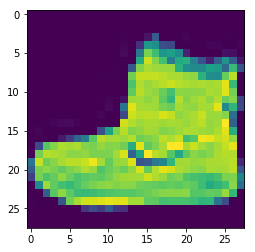

label: Ankle boot


In [48]:
# Display one of the images

i = 0 
img = train_images[i,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [26]:
# Fit the model
# you need to add a dummy channel dimension to the dataset
# (that's what the [...,np.newaxis] provides)
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256)


Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 51s 844us/sample - loss: 0.3318 - sparse_categorical_accuracy: 0.8822 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 [==============================] - 49s 815us/sample - loss: 0.3112 - sparse_categorical_accuracy: 0.8884 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 [==============================] - 49s 810us/sample - loss: 0.3003 - sparse_categorical_accuracy: 0.8925 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 [==============================] - 49s 817us/sample - loss: 0.2877 - sparse_categorical_accuracy: 0.8968 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 [==============================] - 49s 812us/sample - loss: 0.2799 - sparse_categorical_accuracy: 0.8992 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 [==============================] - 48s 805us/sample - loss: 0.2735 - sparse_categorical_accuracy: 0.9023 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 [============

#### Plot training history

In [49]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.331779,0.882183,4.420000
1,0.311236,0.888400,4.420000
2,0.300330,0.892467,4.420002
3,0.287732,0.896800,4.419999
4,0.279918,0.899183,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

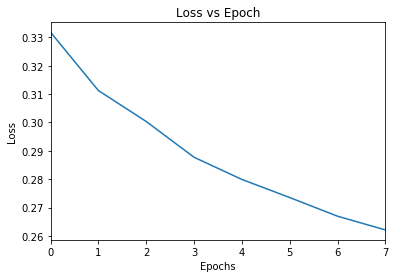

In [50]:
# Make a plot for the loss

loss_plot = df.plot(y= 'loss', title="Loss vs Epoch", legend= False)
loss_plot.set(xlabel="Epochs", ylabel='Loss')

[Text(0, 0.5, 'Accuracy (%)'), Text(0.5, 0, 'Epochs')]

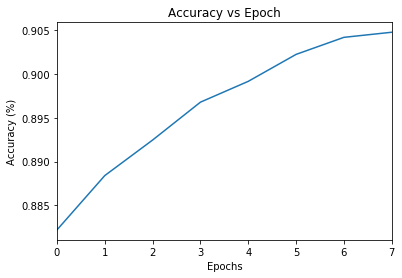

In [51]:
# Make a plot for the accuracy

acc_plot = df.plot(y="sparse_categorical_accuracy", title="Accuracy vs Epoch", legend= False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy (%)')

[Text(17.200000000000003, 0.5, 'Error'),
 Text(0.5, 17.200000000000003, 'Epochs')]

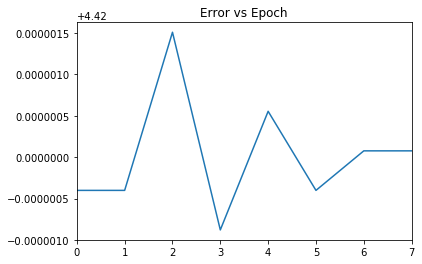

In [52]:
# Make a plot for the additional metric

mae_plot = df.plot(y="mean_absolute_error", title="Error vs Epoch", legend= False)
acc_plot.set(xlabel='Epochs', ylabel='Error')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [53]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [54]:
# Evaluate the model

# you need to add a dummy channel dimension to the dataset
test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

10000/1 - 5s - loss: 2.2929 - sparse_categorical_accuracy: 0.1125 - mean_absolute_error: 4.4200


In [55]:
test_accuracy

0.1125

#### Make predictions from the model

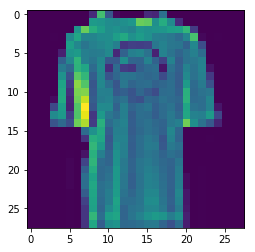

Label: T-shirt/top


In [60]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [61]:
test_image.shape

(28, 28)

In [62]:
# predict expects a batch of images, so the first dimension is the number of 
# examples being passed through predict
# The second dummy dimension is the number of channels
test_image[np.newaxis,...,np.newaxis].shape

(1, 28, 28, 1)

In [63]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction: {labels[np.argmax(predictions)]}")

Model prediction: T-shirt/top
